# Crop and paste images

We will now show how to crop and paste images using the pyclesperanto librairy

In [1]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 48
	Global Memory Size: 8358 MB
	Maximum Object Size: 2089 MB

# Get an example data and push it to the GPU

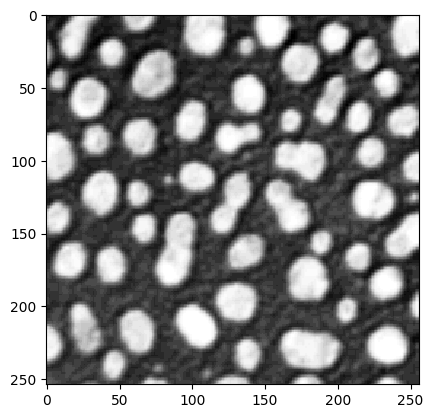

In [2]:
# load data
image = cle.push(imread('https://samples.fiji.sc/blobs.png').squeeze())
cle.imshow(image)

In [3]:
cle.crop?

Signature:
cle.crop(
    input_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array],
    output_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array] = None,
    start_x: int = 0,
    start_y: int = 0,
    start_z: int = 0,
    width: int = 0,
    height: int = 0,
    depth: int = 0,
    device: pyclesperanto._pyclesperanto._Device = None,
) -> Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array]
Docstring: <no docstring>
File:      ~/Libraries/miniconda3/envs/build8/lib/python3.11/site-packages/pyclesperanto/_tier1.py
Type:      function

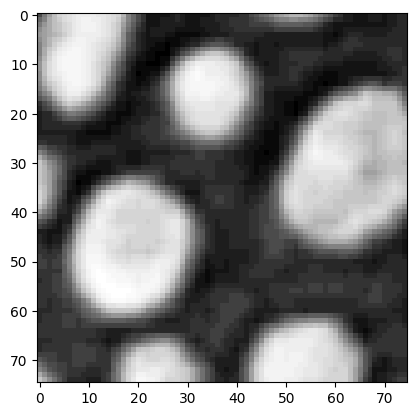

In [4]:
width = 75
height = 75
x = 10
y = 10
tile = cle.crop(image, start_x=x, start_y=y, width=width, height=height)
cle.imshow(tile)

## Create output image

We create and empty image and make a collage by pasting the cropped image into it. We also transform the cropped image for visualisation purposes:

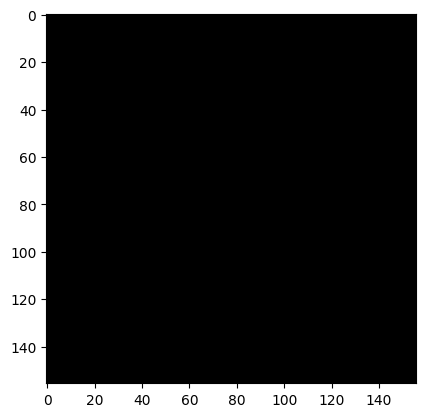

In [5]:
collage = cle.create((width * 2 + 6, height * 2 + 6))

# "white" background
cle.set(collage, 255)

cle.imshow(collage)

# Paste the tile into our output image

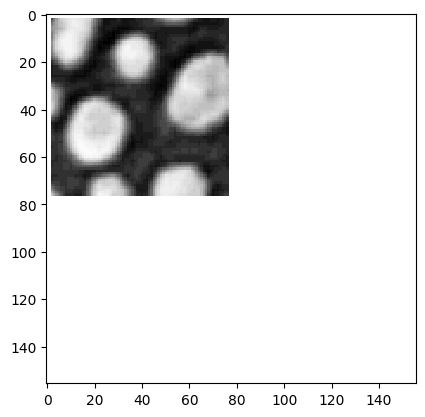

In [6]:
cle.paste(tile, collage, 2, 2)
cle.imshow(collage)

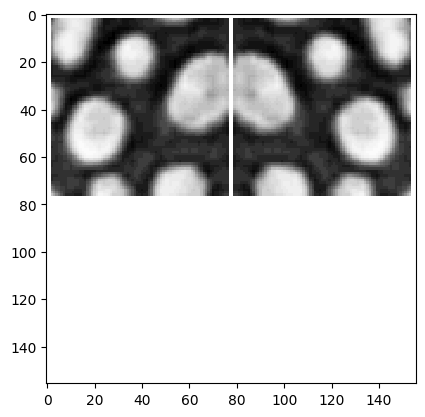

In [7]:
flip_tile = cle.flip(tile, flip_x=True, flip_y=False)
cle.paste(flip_tile, collage, width + 4, 2)
cle.imshow(collage)

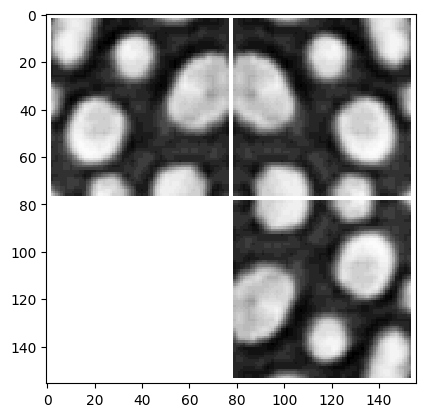

In [8]:
flip_tile = cle.flip(tile, flip_x=True, flip_y=True)
cle.paste(flip_tile, collage, width + 4, height + 4)
cle.imshow(collage)

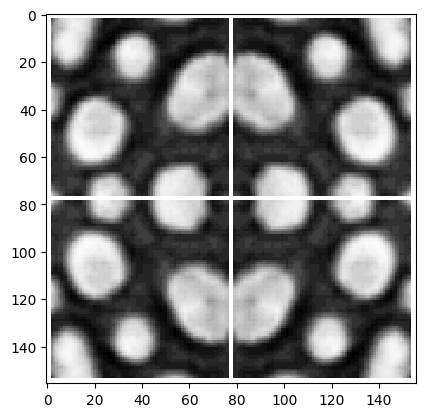

In [9]:
flip_tile = cle.flip(tile, flip_x=False, flip_y=True)
cle.paste(flip_tile, collage, 2, height + 4)
cle.imshow(collage)